# Bank Marketing Campaign EDA + LR Training

In [2]:
# Packages Import

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import Dataset 

train_data = pd.read_csv("/workspaces/gustavolima-bank-eda/data/raw/bank-marketing-campaign-data.csv", delimiter=';')
test_data = pd.read_csv("/workspaces/gustavolima-bank-eda/data/raw/bank-marketing-campaign-data.csv", delimiter=';')

total_data = pd.concat([train_data, test_data]).reset_index(inplace = False)
total_data.head()


,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


##### Explore the DataSet


In [4]:
# Dataset Shape

total_data.shape

(82376, 22)

In [5]:
# Dataset Info about Data Types and NA

total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82376 entries, 0 to 82375
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           82376 non-null  int64  
 1   age             82376 non-null  int64  
 2   job             82376 non-null  object 
 3   marital         82376 non-null  object 
 4   education       82376 non-null  object 
 5   default         82376 non-null  object 
 6   housing         82376 non-null  object 
 7   loan            82376 non-null  object 
 8   contact         82376 non-null  object 
 9   month           82376 non-null  object 
 10  day_of_week     82376 non-null  object 
 11  duration        82376 non-null  int64  
 12  campaign        82376 non-null  int64  
 13  pdays           82376 non-null  int64  
 14  previous        82376 non-null  int64  
 15  poutcome        82376 non-null  object 
 16  emp.var.rate    82376 non-null  float64
 17  cons.price.idx  82376 non-null 

There's no NaN data in the dataset which is good

In [6]:
# Find Duplicates and Clear Them

if total_data.duplicated().sum() > 0 :
    total_data.drop_duplicates(),

total_data.shape

(82376, 22)

For now, after analysis, there's is no Feature to remove, all of them can be used for our model. 

### Univariate Data Analysis

#### Univariate Categorical Data Analysis

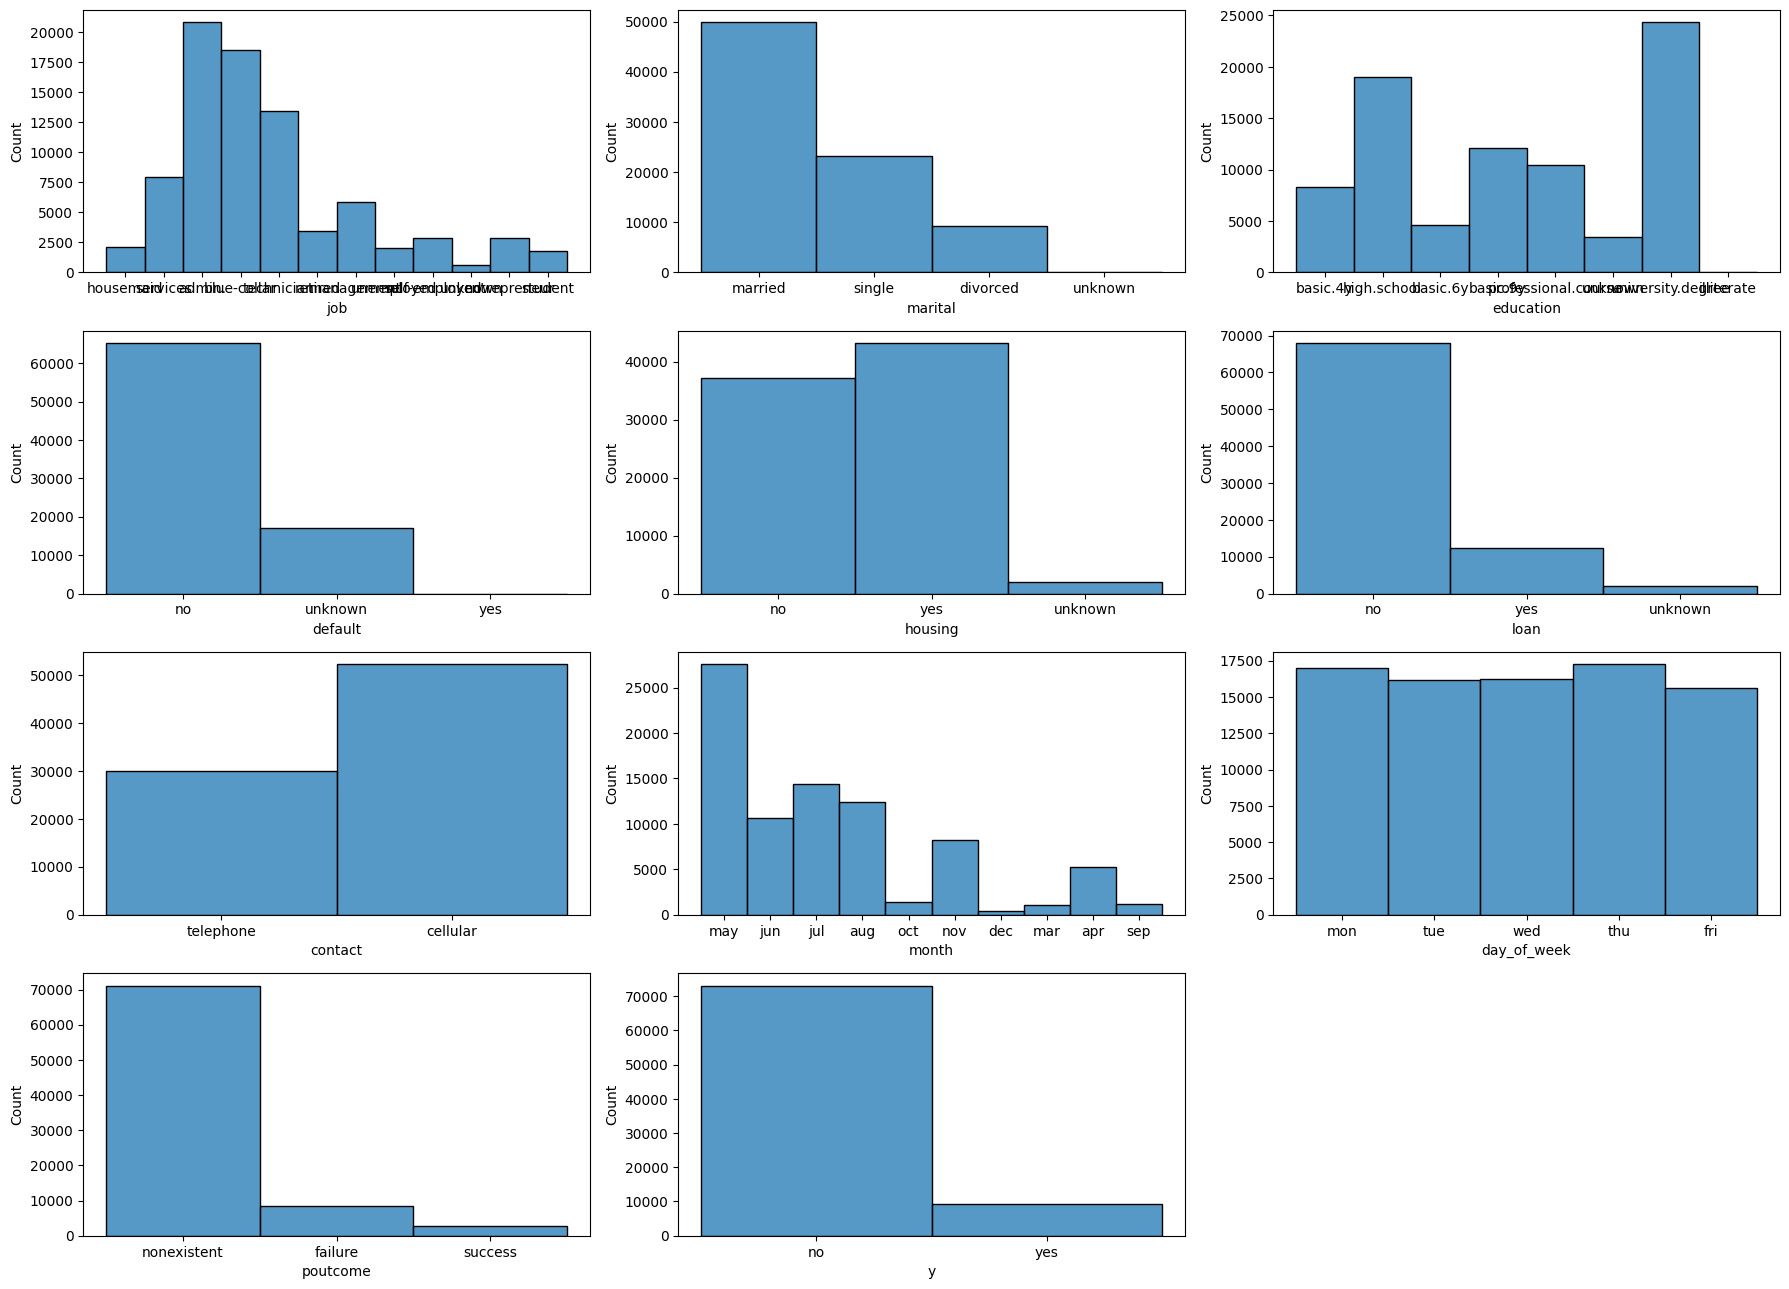

In [7]:
# Plot Categorial Data in Historgrams

fig, axis = plt.subplots(4, 3, figsize=(18, 13))

# Create the Plots

sns.histplot(ax= axis[0,0], data= total_data, x= 'job')
sns.histplot(ax= axis[0,1], data= total_data, x= 'marital')
sns.histplot(ax= axis[0,2], data= total_data, x= 'education')
sns.histplot(ax= axis[1,0], data= total_data, x= 'default')
sns.histplot(ax= axis[1,1], data= total_data, x= 'housing')
sns.histplot(ax= axis[1,2], data= total_data, x= 'loan')
sns.histplot(ax= axis[2,0], data= total_data, x= 'contact')
sns.histplot(ax= axis[2,1], data= total_data, x= 'month')
sns.histplot(ax= axis[2,2], data= total_data, x= 'day_of_week')
sns.histplot(ax= axis[3,0], data= total_data, x= 'poutcome')
sns.histplot(ax= axis[3,1], data= total_data, x= 'y')
fig.delaxes(axis[3,2])

# Tight Layout
plt.tight_layout()

# Plot
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

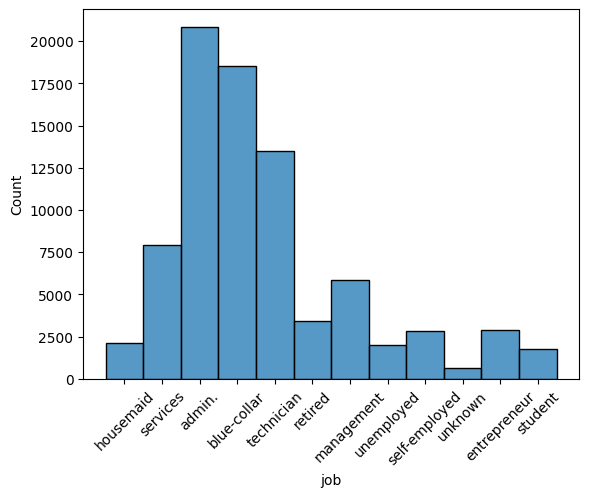

In [8]:
sns.histplot(data= total_data, x= 'job')
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

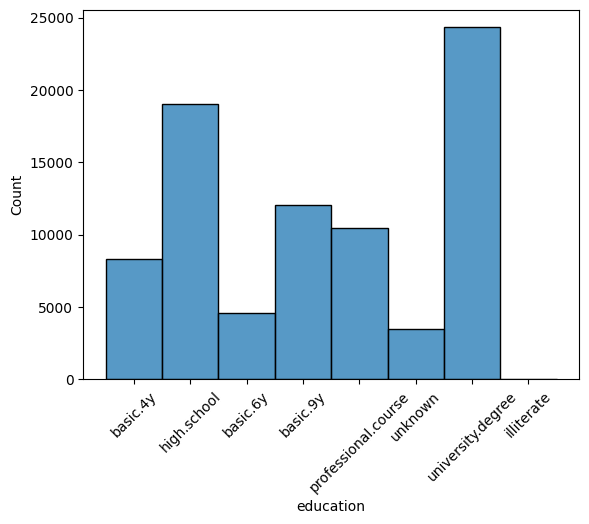

In [9]:
sns.histplot(data= total_data, x= 'education')
plt.xticks(rotation=45)
plt.show

We can observe a few things from this data:

- Adminstrative, Blue-Collar and Technicians are most of the job count. 
- Majority of customers are married, followed by single.
- The customers are mainly University Educated and High School
- Customers have no credits, but the majority have house loans, but only a little percentage have personal loans
- Summer time is when there are more calls, and everyday a similar number of calls is done
- And majority of customer refuse the product offer, which makes the campaign not that succesful

#### Univariate Numerical Data Analysis

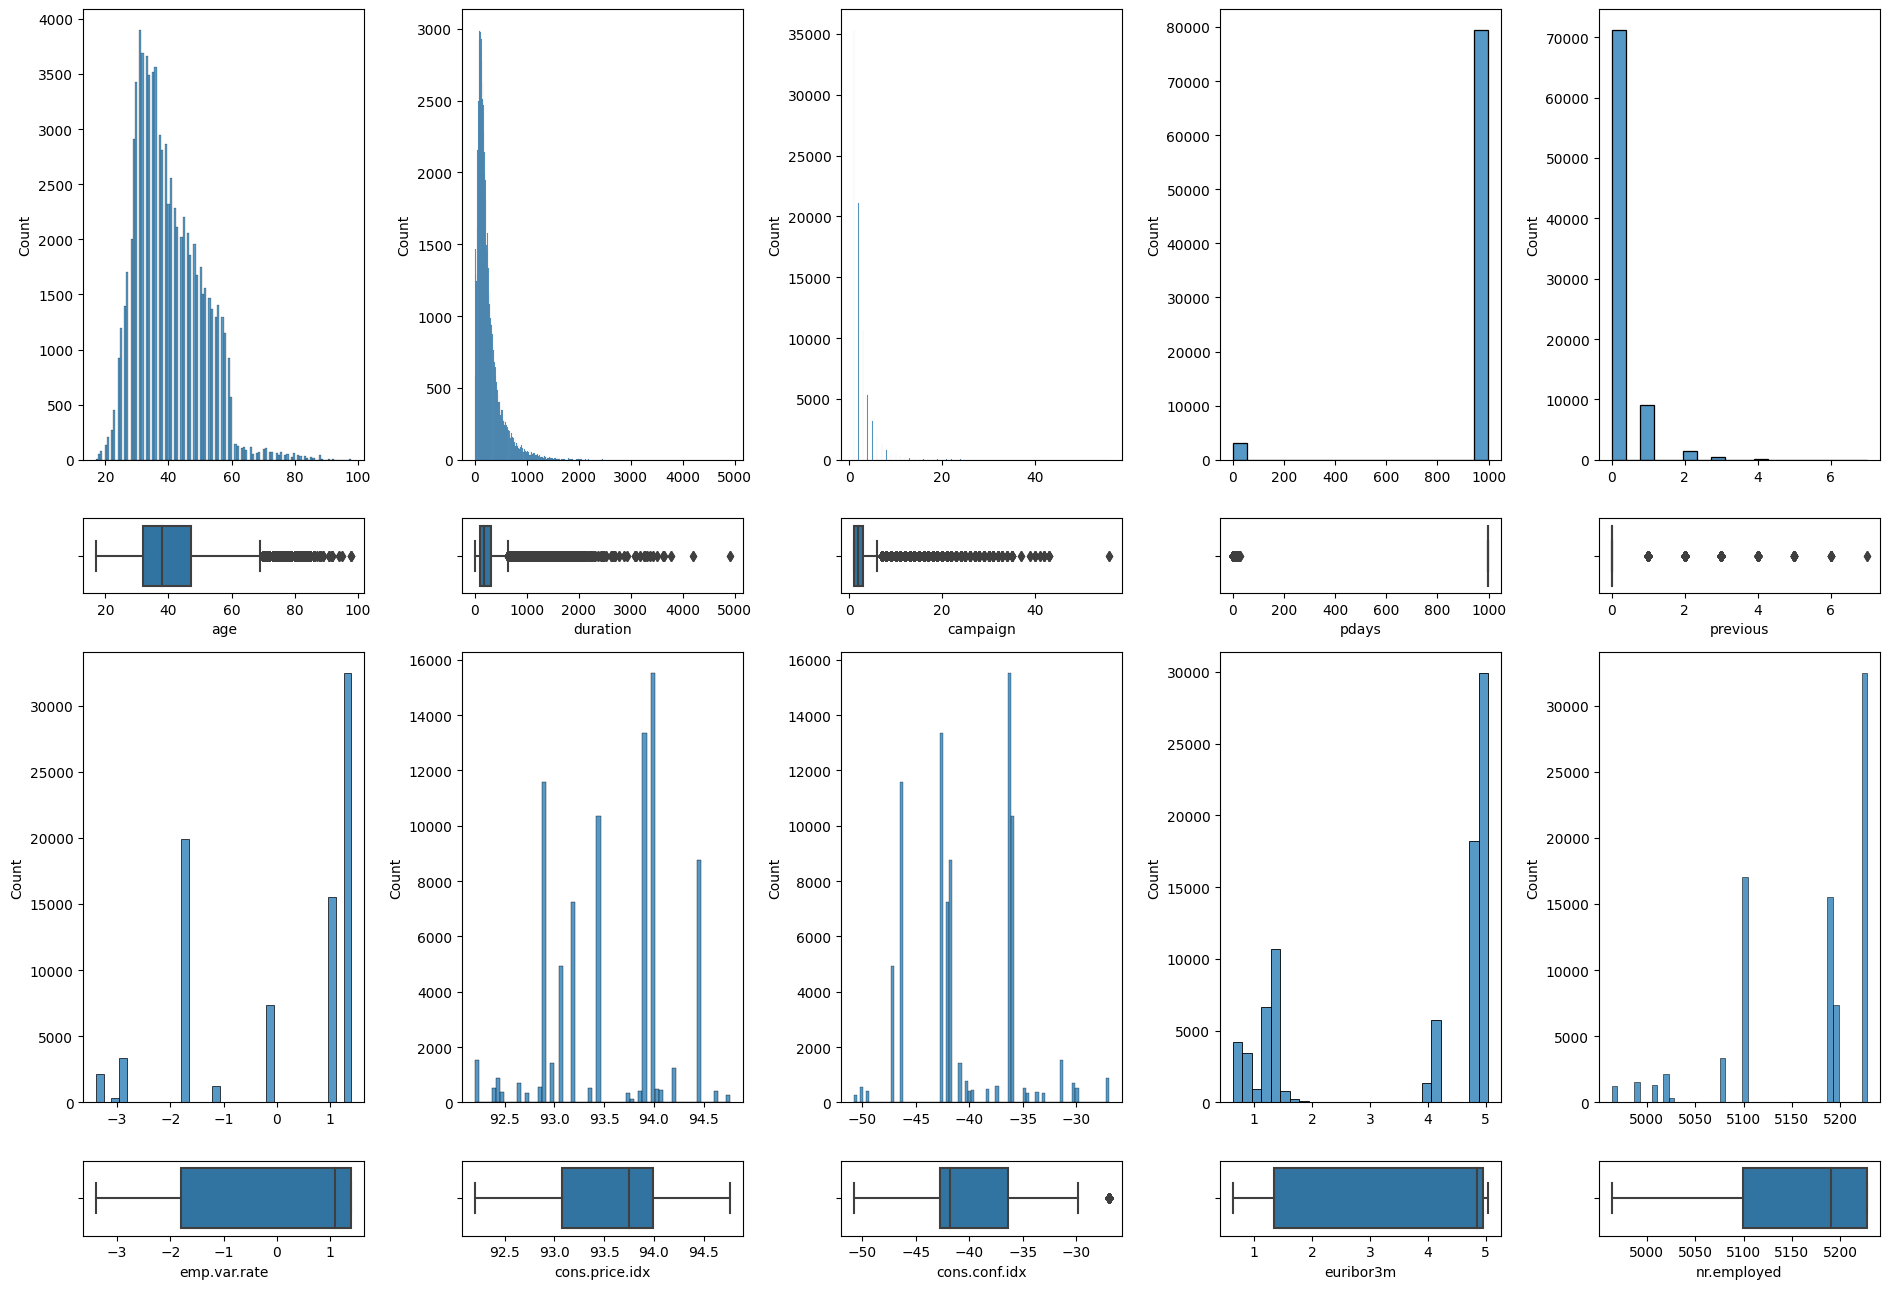

In [10]:
# Univariate Numerical Data Analysis

# Draw Canvas
fig, axis = plt.subplots(4, 5, figsize = (19, 13), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Plot the Data

sns.histplot(ax=axis[0,0], data=total_data, x='age').set(xlabel = None)
sns.boxplot(ax=axis[1,0], data=total_data, x='age')
sns.histplot(ax=axis[0,1], data=total_data, x='duration').set(xlabel = None)
sns.boxplot(ax=axis[1,1], data=total_data, x='duration')
sns.histplot(ax=axis[0,2], data=total_data, x='campaign').set(xlabel = None)
sns.boxplot(ax=axis[1,2], data=total_data, x='campaign')
sns.histplot(ax=axis[0,3], data=total_data, x='pdays').set(xlabel = None)
sns.boxplot(ax=axis[1,3], data=total_data, x='pdays')
sns.histplot(ax=axis[0,4], data=total_data, x='previous').set(xlabel = None)
sns.boxplot(ax=axis[1,4], data=total_data, x='previous')
sns.histplot(ax=axis[2,0], data=total_data, x='emp.var.rate').set(xlabel = None)
sns.boxplot(ax=axis[3,0], data=total_data, x='emp.var.rate')
sns.histplot(ax=axis[2,1], data=total_data, x='cons.price.idx').set(xlabel = None)
sns.boxplot(ax=axis[3,1], data=total_data, x='cons.price.idx')
sns.histplot(ax=axis[2,2], data=total_data, x='cons.conf.idx').set(xlabel = None)
sns.boxplot(ax=axis[3,2], data=total_data, x='cons.conf.idx')
sns.histplot(ax=axis[2,3], data=total_data, x='euribor3m').set(xlabel = None)
sns.boxplot(ax=axis[3,3], data=total_data, x='euribor3m')
sns.histplot(ax=axis[2,4], data=total_data, x='nr.employed').set(xlabel = None)
sns.boxplot(ax=axis[3,4], data=total_data, x='nr.employed')

# Tight Layout Adjustment
plt.tight_layout()

# Plot the Data
plt.show()

We can see by the data that:

- age, campaign, previous are close to a normal distributions, with a lot of outliers far from the normal distribution

### Multivariate Variables Analysis

#### Numerical-numerical analysis

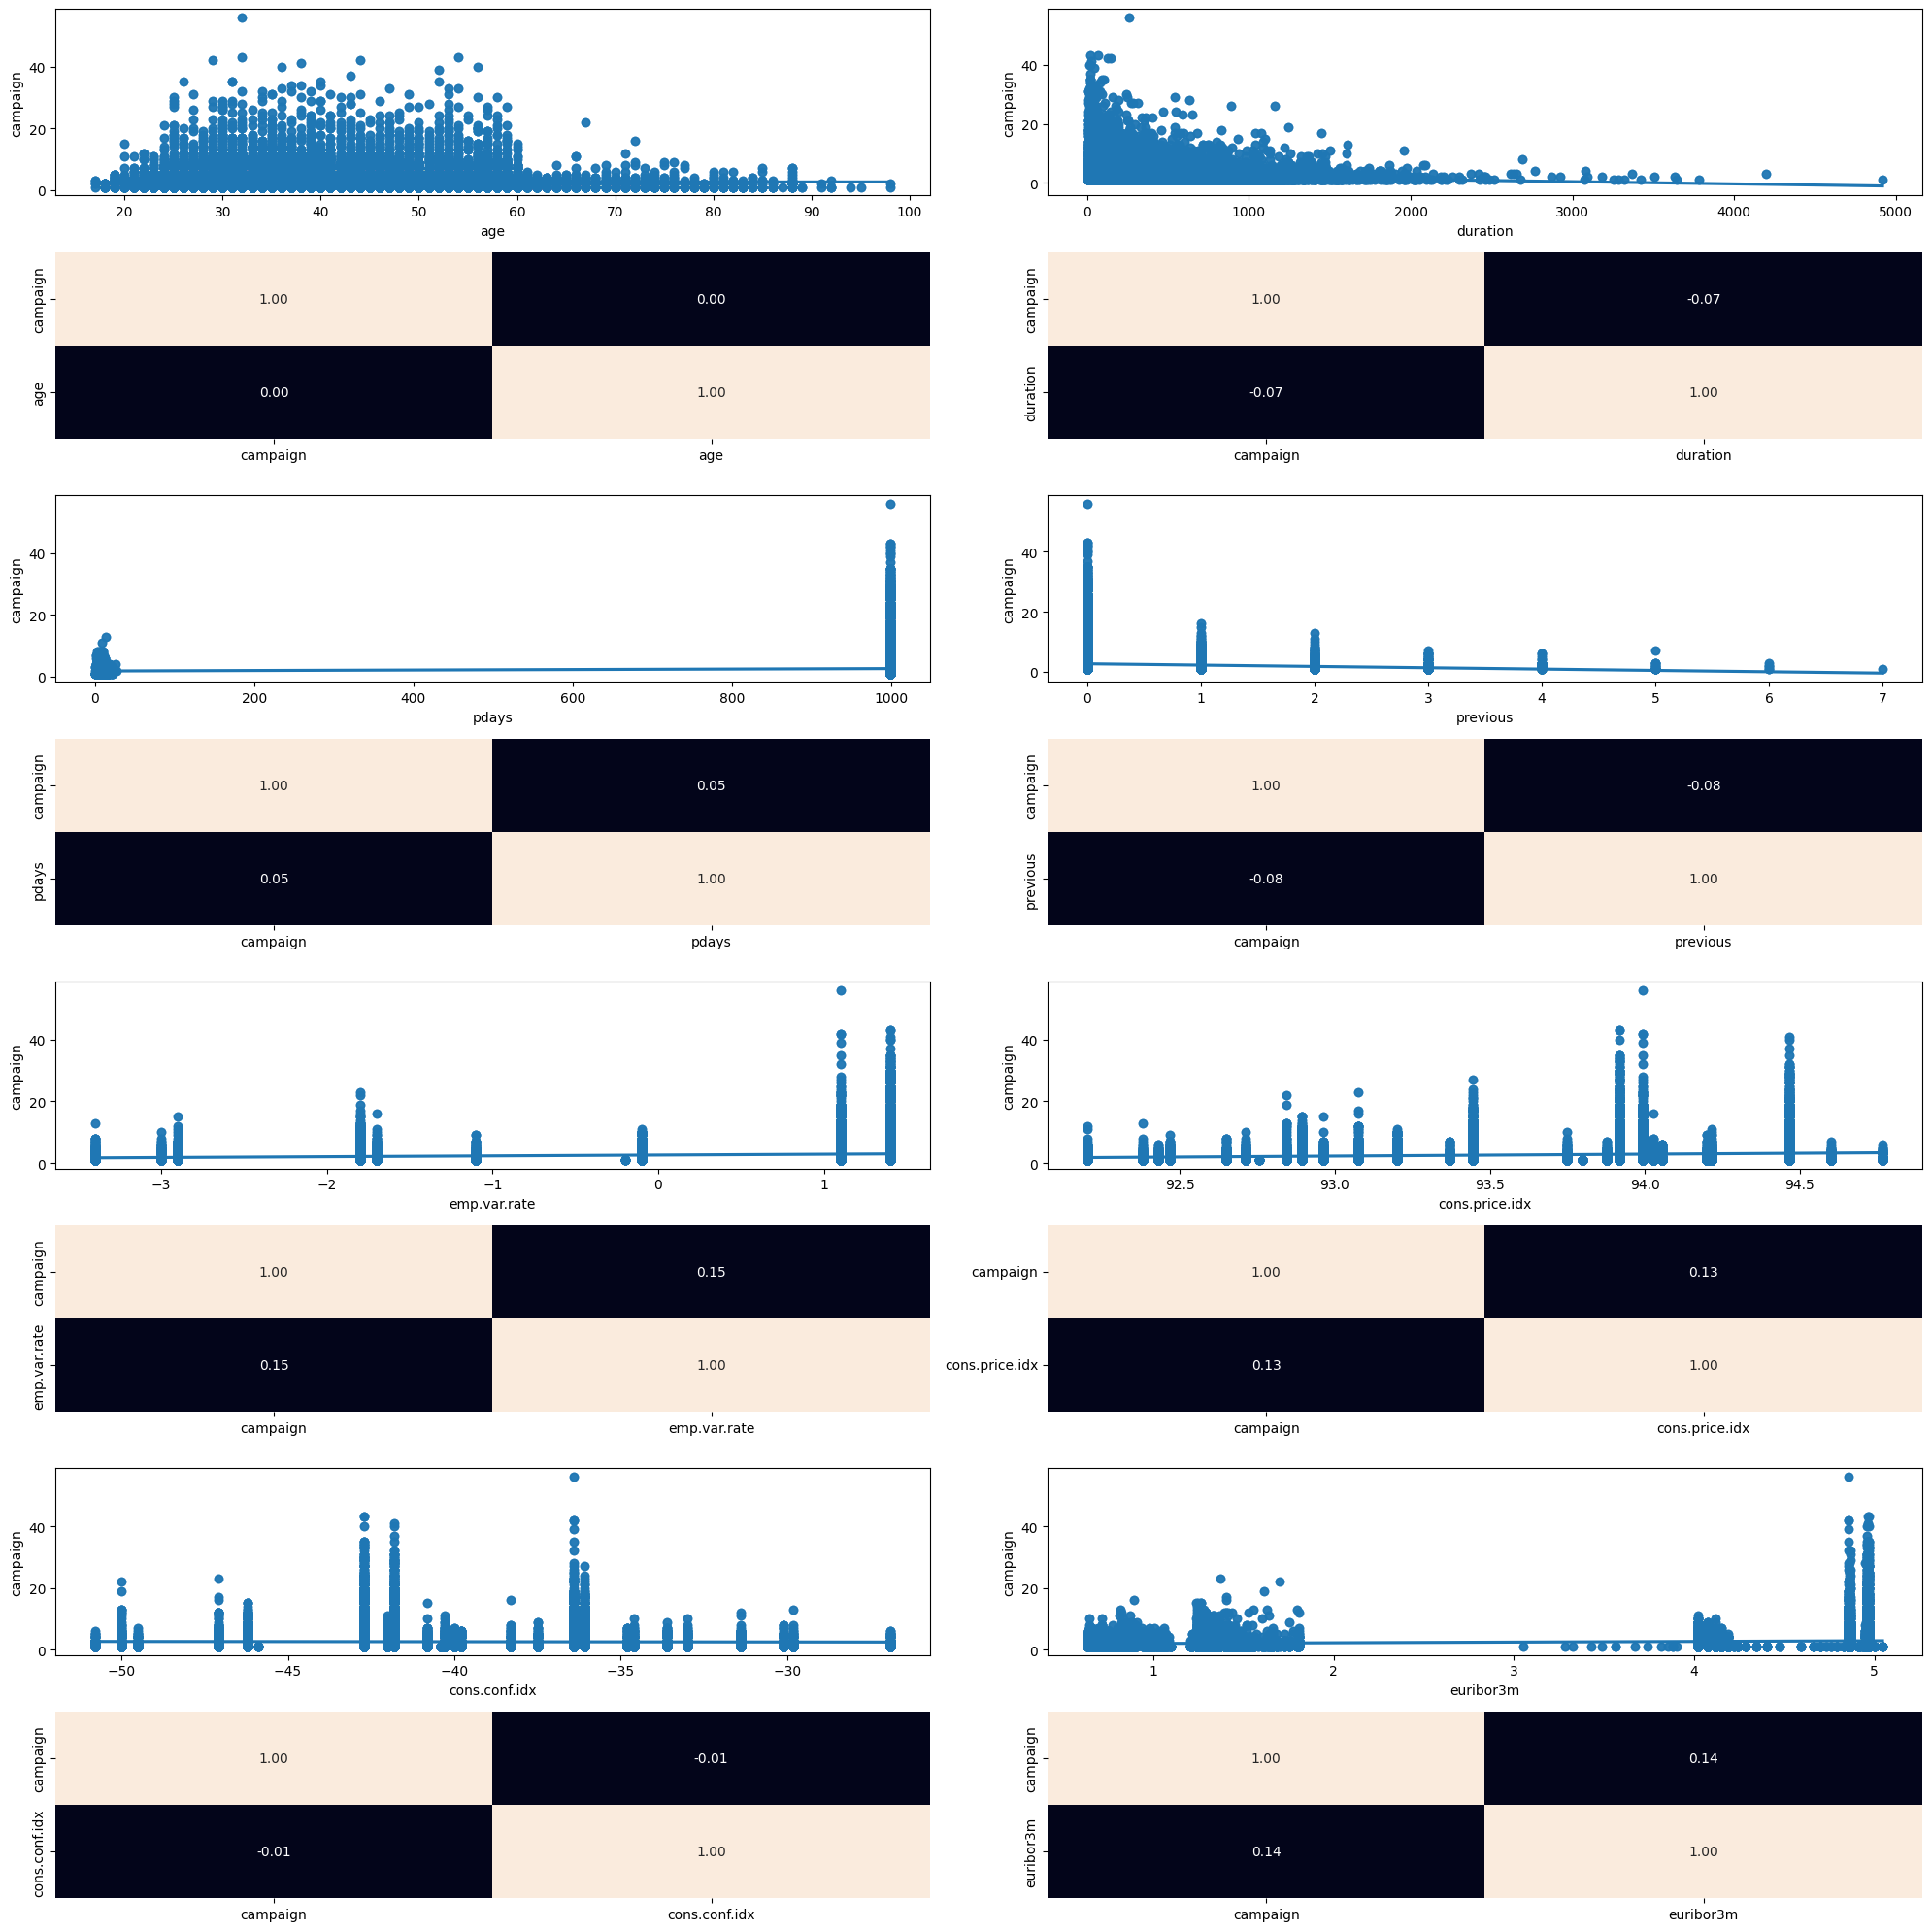

In [11]:
# Numerical-Numerical Analysis of the Dataset

# Draw a canvas
fig, axis = plt.subplots(8, 2, figsize=(20, 20))

# Plot the data
sns.regplot(ax=axis[0,0], data=total_data, x='age', y='campaign')
sns.heatmap(total_data[['campaign', 'age']].corr(), annot=True, fmt='.2f', ax=axis[1,0], cbar=False)
sns.regplot(ax=axis[0,1], data=total_data, x='duration', y='campaign')
sns.heatmap(total_data[['campaign', 'duration']].corr(), annot=True, fmt='.2f', ax=axis[1,1], cbar=False)
sns.regplot(ax=axis[2,0], data=total_data, x='pdays', y='campaign')
sns.heatmap(total_data[['campaign', 'pdays']].corr(), annot=True, fmt='.2f', ax=axis[3,0], cbar=False)
sns.regplot(ax=axis[2,1], data=total_data, x='previous', y='campaign')
sns.heatmap(total_data[['campaign', 'previous']].corr(), annot=True, fmt='.2f', ax=axis[3,1], cbar=False)
sns.regplot(ax=axis[4,0], data=total_data, x='emp.var.rate', y='campaign')
sns.heatmap(total_data[['campaign', 'emp.var.rate']].corr(), annot=True, fmt='.2f', ax=axis[5,0], cbar=False)
sns.regplot(ax=axis[4,1], data=total_data, x='cons.price.idx', y='campaign')
sns.heatmap(total_data[['campaign', 'cons.price.idx']].corr(), annot=True, fmt='.2f', ax=axis[5,1], cbar=False)
sns.regplot(ax=axis[6,0], data=total_data, x='cons.conf.idx', y='campaign')
sns.heatmap(total_data[['campaign', 'cons.conf.idx']].corr(), annot=True, fmt='.2f', ax=axis[7,0], cbar=False)
sns.regplot(ax=axis[6,1], data=total_data, x='euribor3m', y='campaign')
sns.heatmap(total_data[['campaign', 'euribor3m']].corr(), annot=True, fmt='.2f', ax=axis[7,1], cbar=False)

# Adjust Layout
plt.tight_layout()

# Plot the Data
plt.show()

#### Categorical - Categorical Analysis

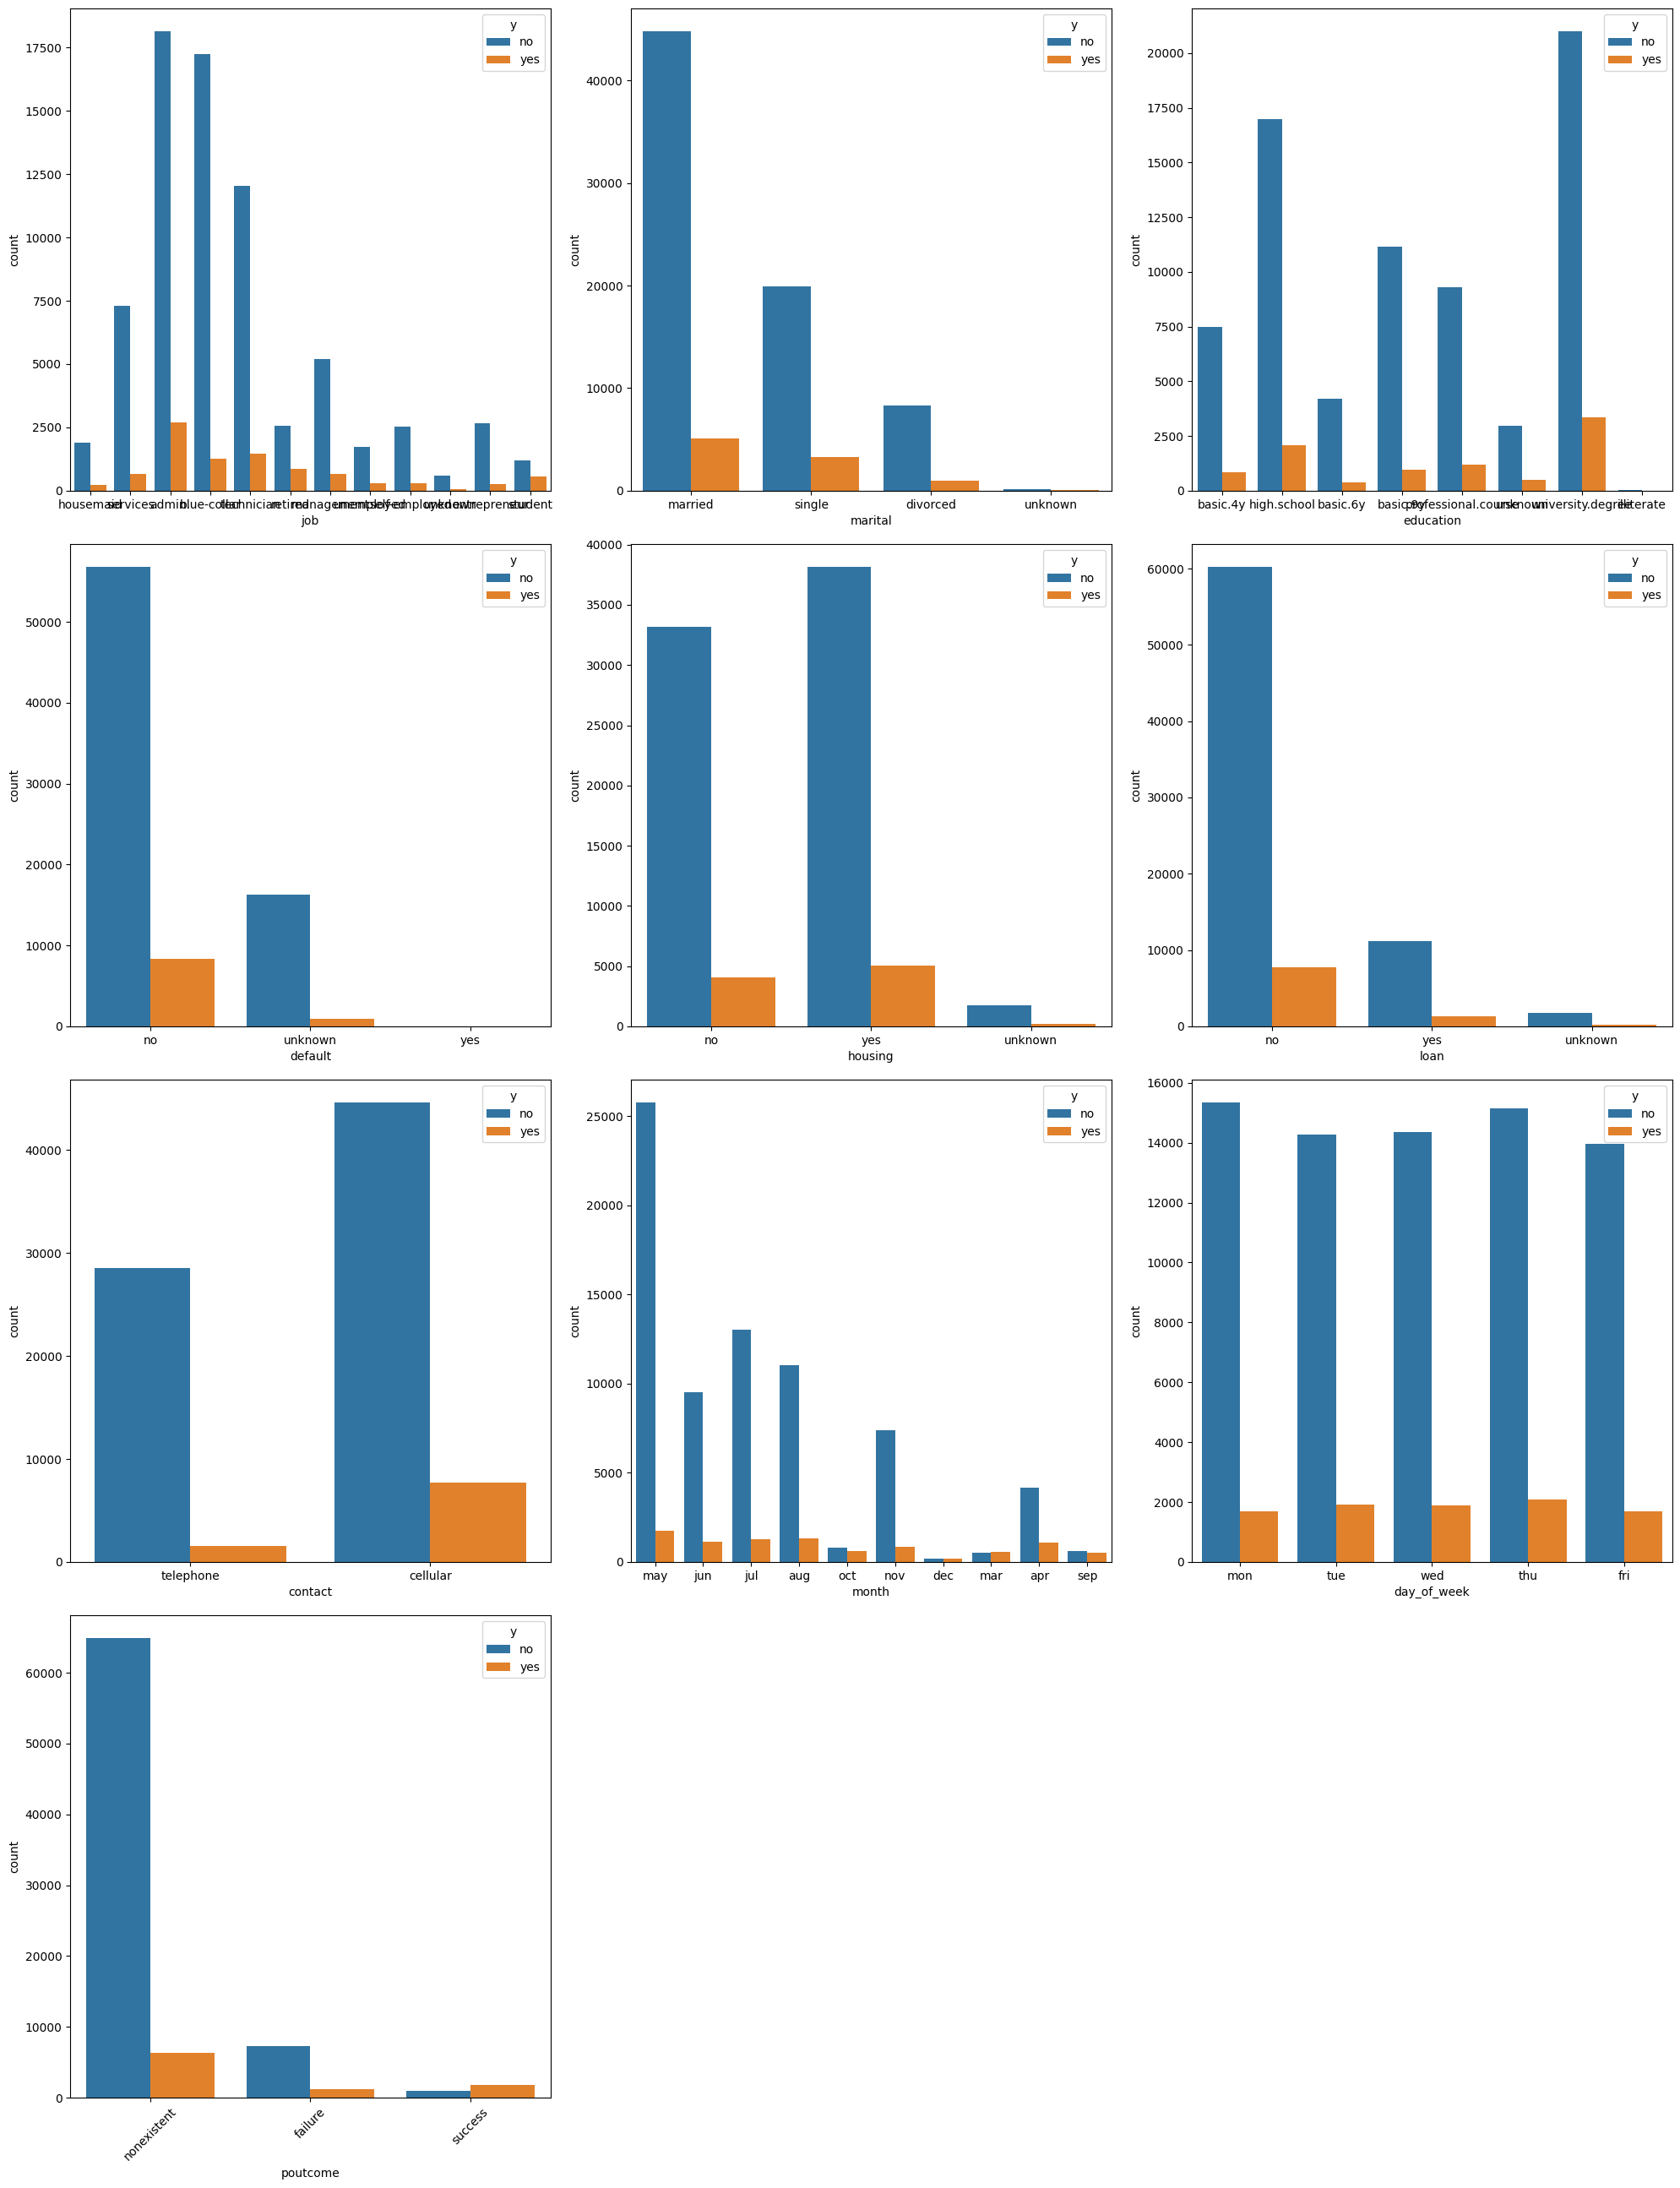

In [12]:
# Categorical - Categorical Analysis - The Class and Several Predictors

# Draw a Canvas
fig, axis = plt.subplots(4, 3, figsize=(20, 26))

# Plot the Data
sns.countplot(ax=axis[0,0], data=total_data, x='job', hue='y')
sns.countplot(ax=axis[0,1], data=total_data, x='marital', hue='y')
sns.countplot(ax=axis[0,2], data=total_data, x='education', hue='y')
sns.countplot(ax=axis[1,0], data=total_data, x='default', hue='y')
sns.countplot(ax=axis[1,1], data=total_data, x='housing', hue='y')
sns.countplot(ax=axis[1,2], data=total_data, x='loan', hue='y')
sns.countplot(ax=axis[2,0], data=total_data, x='contact', hue='y')
sns.countplot(ax=axis[2,1], data=total_data, x='month', hue='y')
sns.countplot(ax=axis[2,2], data=total_data, x='day_of_week', hue='y')
sns.countplot(ax=axis[3,0], data=total_data, x='poutcome', hue='y')
fig.delaxes(axis[3,1])
fig.delaxes(axis[3,2])

# Adjust the layout
plt.xticks(rotation=45)
plt.tight_layout()

# Plot the Layout
plt.show()

We can observe that:

- The Success Rate of the campaign is very low across the board. 
- However we can see that celular contacts have higher chance of success
- People with loans don't want more debts as per graphic
- House Loan customers, tend to accept more than the ones who don't
- University Degree customers have the higher acceptance rate
- Admin workers are also the more accepting ones, perhaps due to lower salaries? 

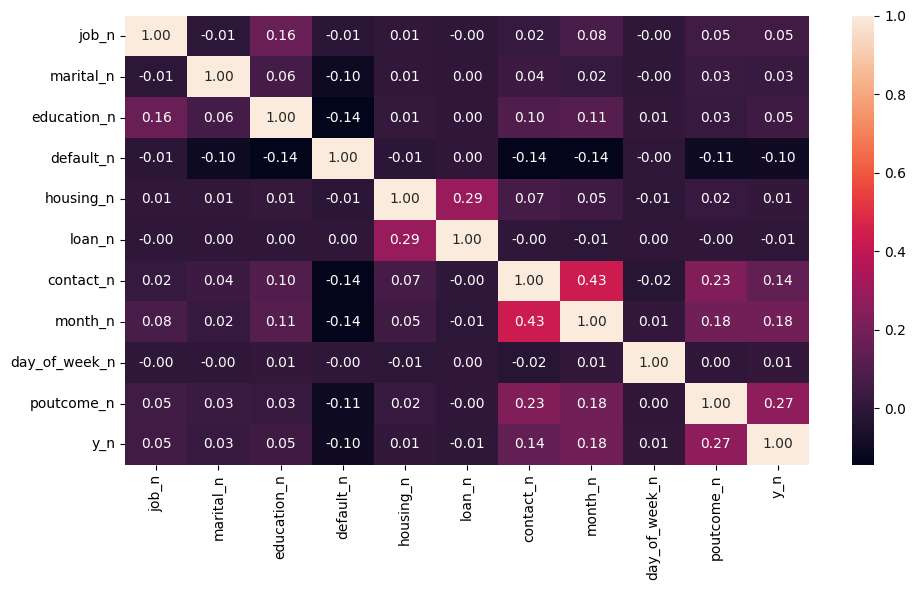

In [13]:
# Factorize the Current Categorical Data
total_data['job_n'] = pd.factorize(total_data['job'])[0]
total_data['marital_n'] = pd.factorize(total_data['marital'])[0]
total_data['education_n'] = pd.factorize(total_data['education'])[0]
total_data['default_n'] = pd.factorize(total_data['default'])[0]
total_data['housing_n'] = pd.factorize(total_data['housing'])[0]
total_data['loan_n'] = pd.factorize(total_data['loan'])[0]
total_data['contact_n'] = pd.factorize(total_data['contact'])[0]
total_data['month_n'] = pd.factorize(total_data['month'])[0]
total_data['day_of_week_n'] = pd.factorize(total_data['day_of_week'])[0]
total_data['poutcome_n'] = pd.factorize(total_data['poutcome'])[0]
total_data['y_n'] = pd.factorize(total_data['y'])[0]

# Draw a Canvas
fig, axis = plt.subplots(figsize = (10, 6))

# Plot a Heatmap
sns.heatmap(total_data[['job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n',
                        'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n', 'y_n']].corr(), annot=True, fmt='.2f')

# Adjust Layout
plt.tight_layout()

# Plot Layout
plt.show()

We can observe:

- There's a good correlation between Type of Contact and the Month it was made.
- There's a small relation between having a Housing Loand and a Personal Loan
- And there's also a ver small relation between the Type of contact, the Long-Term Deposit Sale and the Outcome of the Previous Contacts (obviously) 

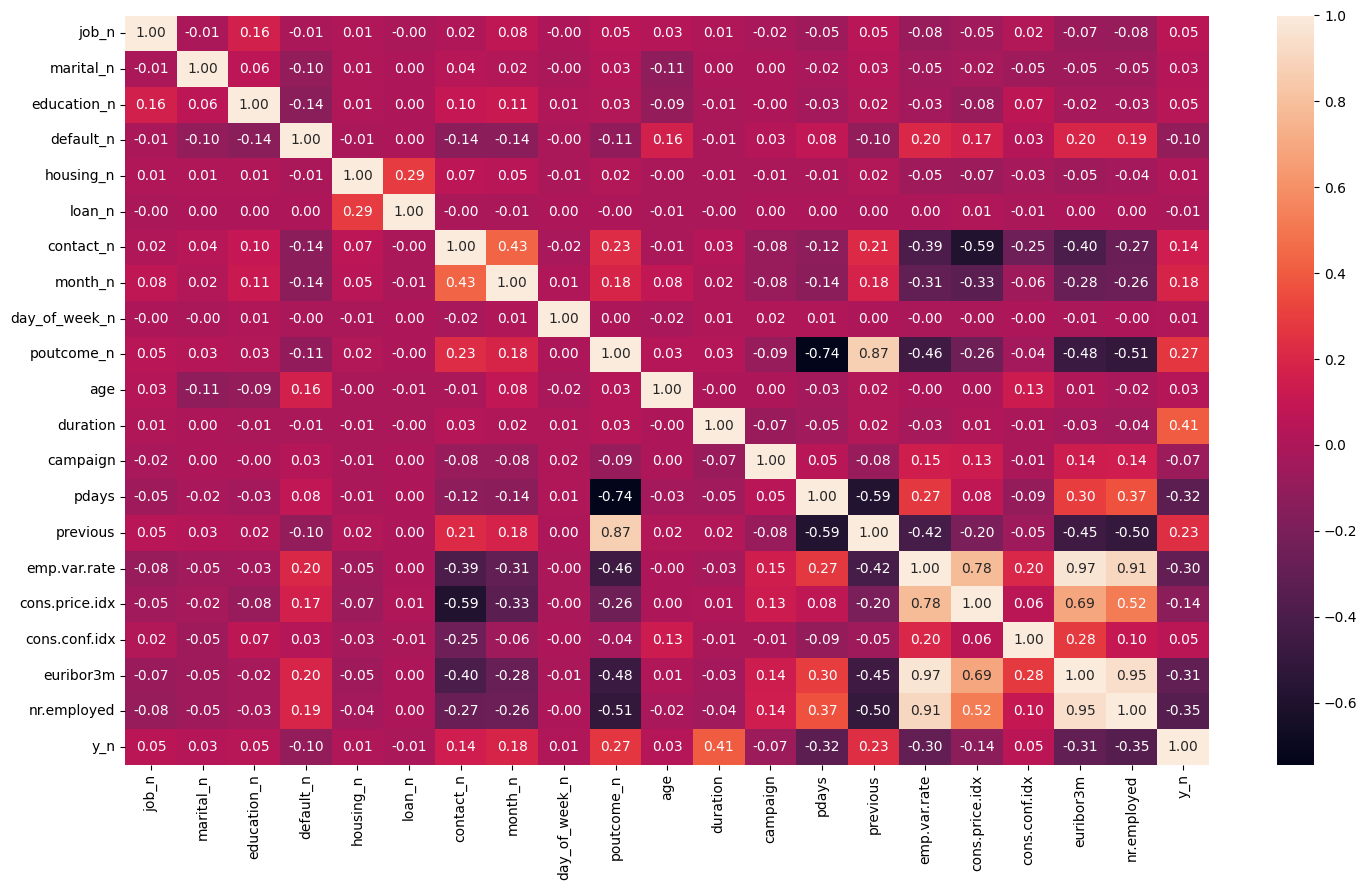

In [14]:
# Complete Correlation Heatmap

# Draw a Canvas
fig, axis = plt.subplots(figsize = (15, 9))

# Plot a Heatmap
sns.heatmap(total_data[['job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n',
                        'contact_n', 'month_n', 'day_of_week_n', 'poutcome_n', 'age', 'duration',
                        'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                          'euribor3m', 'nr.employed', 'y_n']].corr(), annot=True, fmt='.2f')

# Adjust Layout
plt.tight_layout()

# Plot Layout
plt.show()

There's good data here and somewhat expected:

- The Outcome has a high correlation between the number of previous contacts and also the difference in days from last campaign call
- Consumer Price Index, Euribor, Number of Employed People and Consumer Confidence all have tight correlations, as expected. 
- Can mean something, or not, but the duration of the calls have a nice correlatio with the Success of the customer taking longterm deposit. 
- Surprisingly Euribor / Employment / Indexes have a nice correlation with the type of contact, but average relation with the reults of previous contact. 
- It looks like it's in between the time, moment, and effort put on the call plus a little help of the Taxes / Consumer Index.


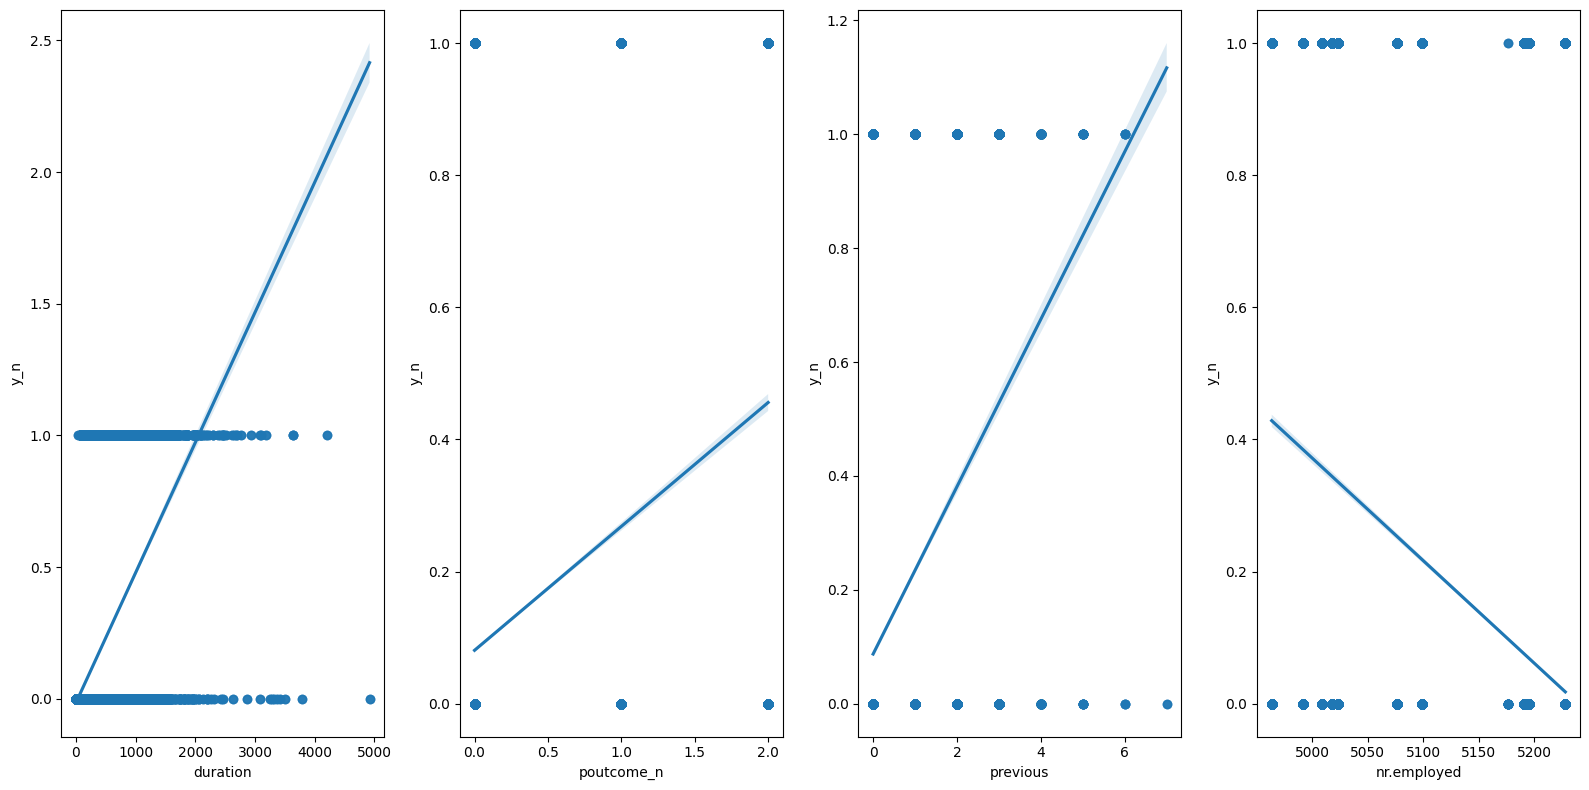

In [19]:
# Regplot the strong relationship Features

fig, axis = plt.subplots(figsize = (16, 8), ncols = 4)

# Plot the Data

sns.regplot(ax=axis[0], data=total_data, x='duration', y='y_n')
sns.regplot(ax=axis[1], data=total_data, x='poutcome_n', y='y_n')
sns.regplot(ax=axis[2], data=total_data, x='previous', y='y_n')
sns.regplot(ax=axis[3], data=total_data, x='nr.employed', y='y_n')

# Adjust Layout
plt.tight_layout()

# Plot
plt.show()

In [20]:
# sns.pairplot(data=total_data)

/home/vscode/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


: 

: 

### Feature Engineering

#### Outlier Analysis

In [1]:
# Describe of Features

total_data.describe()

NameError: name 'total_data' is not defined